In [1]:
import pandas as pd
import hockey_rink as hr
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# read in the data
df = pd.read_csv('Ice_Hockey_Challenge.csv')

In [30]:
scol_coord = [i for i in df.columns if 'StartPlayerCoordinates' in i]
scol_Team = [i for i in df.columns if 'StartPlayerTeam' in i]
scol = scol_coord + scol_Team
pdf_coord = df[scol].copy()

for i, col in enumerate(scol_coord):
    pdf_coord[[f'PlayerPosX_{i+1}', f'PlayerPosY_{i+1}']] = pdf_coord[col].str.split(',', expand=True)

scol_Pos = [i for i in pdf_coord.columns if 'PlayerPos' in i]
pdf_coord[scol_Pos] = pdf_coord[scol_Pos].astype('float')

pdf = pdf_coord[scol_Pos + scol_Team].copy()

In [31]:
rink = hr.IIHFRink()

for i in range(1, 11):
    pdf[f'PlayerPosX_{i}'], pdf[f'PlayerPosY_{i}'] = rink.convert_xy(pdf[f'PlayerPosX_{i}'] * 3.2833 , pdf[f'PlayerPosY_{i}']*3.28)

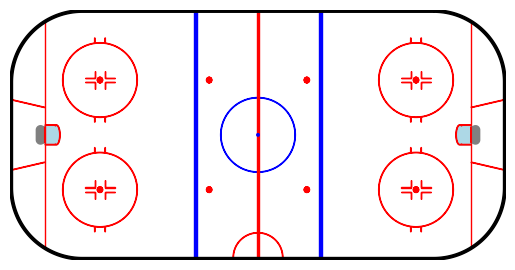

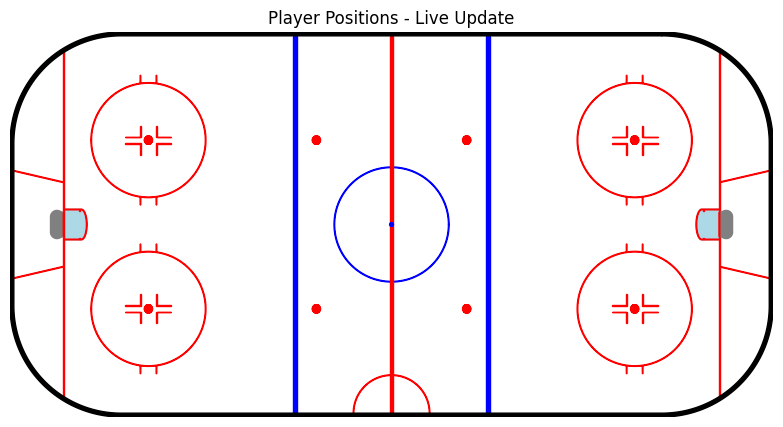

In [50]:
from matplotlib.animation import FuncAnimation
import time

fig, ax = plt.subplots()
rink.draw()

colors = {'Home': 'green', 'Away': 'blue'}

# Set up the figure and axis for animation
fig, ax = plt.subplots(figsize=(10, 5))
rink.draw()  # Draw the rink initially

# Create empty scatter plot objects for players
player_scatters = []
for i in range(1, 5):  # Assuming 4 players
    scatter = ax.scatter([], [], color=colors['Home' if i % 2 == 1 else 'Away'], 
                         edgecolors='white', zorder=5, s=100)
    player_scatters.append(scatter)

# Set limits and titles
ax.set_title('Player Positions - Live Update')
ax.grid(False)  # Turn off the grid if necessary

# Function to update the plot for each frame
def update(frame):
    for i in range(1, 5):  # Assuming 4 players
        # Get player positions and team info for the current frame
        x_pos = pdf_coord[f'PlayerPosX_{i}'][frame]
        y_pos = pdf_coord[f'PlayerPosY_{i}'][frame]
        player_scatters[i - 1].set_offsets((x_pos, y_pos))  # Update scatter positions

    ax.set_title(f'Player Positions - Frame {frame}')  # Update title

# Set up the animation
ani = FuncAnimation(fig, update, frames=len(pdf_coord), repeat=True, interval=1000)

# Show the plot
plt.show()

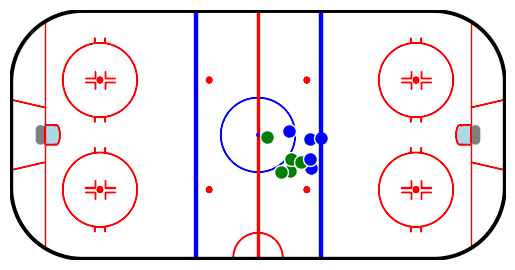

In [35]:
'''
rink.draw()

colors = {'Home': 'green', 'Away': 'blue'}

for i in range(1, 11):
    x_pos = pdf_coord[f'PlayerPosX_{i}'][50]
    y_pos = pdf_coord[f'PlayerPosY_{i}'][50]
    team = pdf_coord[f'StartPlayerTeam{i}'][50]

    plt.scatter(x_pos, y_pos, color=colors[team], edgecolors='white', zorder=5, s=100)

plt.grid(False)  # Turn off the grid if necessary
plt.show()
'''